#***Trabajo Final - Probabilidad y Estadística***
***Integrantes:***

*Johanna Katterine Moreno Angarita - 1011082851*

*William David Hernandez García - 1021668893*

*Sebastián Rincón Castiblanco -1024476769*

In [ ]:
#@title *Librerías*

import pandas as pd
import numpy as np
from math import ceil
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.preprocessing import KBinsDiscretizer
import scipy.stats as ss
from scipy import stats


# ***¿Existe una relación entre la positividad emocional y la popularidad de una canción?***
*Dataset: Top Spotify Songs 2010 - 2019 (Kaggle)*

In [ ]:
#@title *Dataset*
import kagglehub

path = kagglehub.dataset_download("leonardopena/top-spotify-songs-from-20102019-by-year")

print("Path to dataset files:", path)

import os
print(os.listdir(path))

df = pd.read_csv(f'{path}/top10s.csv', encoding='latin-1')

df = df.rename(columns={
    'top genre': 'genre',
    'bpm': 'tempo',
    'nrgy': 'energy',
    'dnce': 'danceability',
    'val': 'valence',
    'dur': 'duration_sec',
    'pop': 'popularity'
})

df = df[['title', 'artist', 'year', 'genre', 'tempo', 'energy', 'danceability', 'valence', 'duration_sec', 'popularity']]
df['duration_min'] = df['duration_sec'] / 60
df = df.drop_duplicates()

df_sample = df.sample(n=100, random_state=42).reset_index(drop=True)

df_sample.head()


Path to dataset files: /kaggle/input/top-spotify-songs-from-20102019-by-year
['top10s.csv']


,title,artist,year,genre,tempo,energy,danceability,valence,duration_sec,popularity,duration_min
0,Call Me Maybe,Carly Rae Jepsen,2012,canadian pop,120,58,78,66,193,76,3.216667
1,Finesse - Remix; feat. Cardi B,Bruno Mars,2018,pop,105,86,70,93,217,78,3.616667
2,Supplies,Justin Timberlake,2018,dance pop,120,55,79,23,226,57,3.766667
3,E.T.,Katy Perry,2011,dance pop,152,87,62,76,230,66,3.833333
4,Rock N Roll,Avril Lavigne,2013,canadian pop,184,96,47,67,207,61,3.450000


In [ ]:
#@title *Paleta de colores*

genres_unicos = df_sample['genre'].unique()
palette_curada = sns.color_palette('dark', n_colors=len(genres_unicos))
genre_palette = dict(zip(genres_unicos, palette_curada))

sns.set_style('white')

#**Secciones**

##**Sección 1: Estadística Descriptiva**

***Variable cuantitativa: Valence***

Esta variable cuantitativa representa la positividad emocional percibida de una canción.

Se eligió por su importancia para explorar el tono emocional del repertorio musical popular.

### **1.1 Cálculo de la media, mediana y desviación estándar**

In [ ]:
#@title *Código de la media, mediana y desviación estándar para valence*

valence_data = df_sample['valence'].dropna()

def medidas_valence(data, titulo):
    media = data['valence'].mean()
    mediana = data['valence'].median()
    desviacion = data['valence'].std()

    negrita_cursiva = '\033[1;3m'
    reset = '\033[0m'

    print(f"{negrita_cursiva}{titulo}:{reset}")
    print(f"{'-'*45}")
    print(f"- Media:                {media:.3f}")
    print(f"- Mediana:              {mediana:.3f}")
    print(f"- Desviación estándar:  {desviacion:.3f}")
    print()

In [ ]:
    medidas_valence(df_sample, "Medidas descriptivas de la variable valence")

Medidas descriptivas de la variable valence:
---------------------------------------------
- Media:                51.490
- Mediana:              50.000
- Desviación estándar:  24.188



### **1.2 Gráficos de distribución**


#### **1.2.1 Histograma**

##### ***- Freedman-Diaconis***

In [ ]:
#@title *Código de la regla de Freedman-Diacons*
def calcular_bins_fd(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    n = len(data)
    bin_width = 2 * iqr / (n ** (1/3))
    bins = int(np.ceil((data.max() - data.min()) / bin_width))
    return bins

valence_data = df_sample['valence']
bins_optimos = calcular_bins_fd(valence_data)

print("Bins óptimos según Freedman-Diaconis:", bins_optimos)

Bins óptimos según Freedman-Diaconis: 6


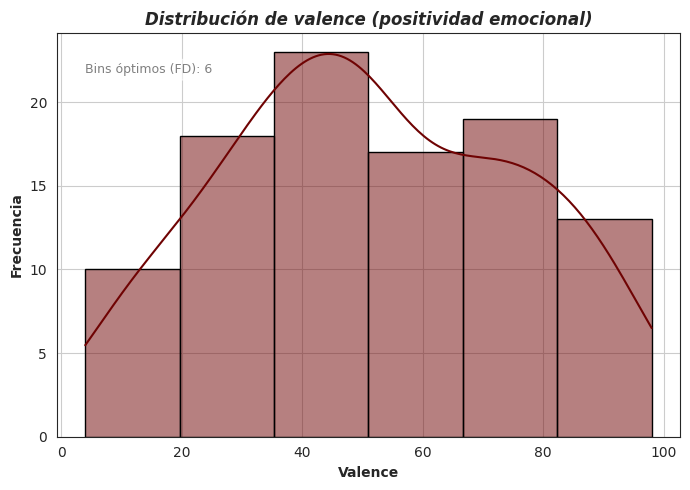

In [ ]:
#@title *Código del histograma de valence con FD*


plt.figure(figsize=(7, 5))
sns.histplot(valence_data, kde=True, color='#6f0303', bins=bins_optimos, edgecolor='black')

plt.title('Distribución de valence (positividad emocional)', fontweight='bold', fontstyle='italic')
plt.xlabel('Valence', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
plt.grid(True)

plt.text(x=valence_data.min() + 0.03,
         y=plt.gca().get_ylim()[1] * 0.9,
         s=f'Bins óptimos (FD): {bins_optimos}',
         fontsize=9,
         color='gray',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


##### ***- Asimetría***

In [ ]:
#@title *Código de la asimetría*

asimetria_valence = skew(df_sample['valence'])
print(f"Asimetría de la variable valence: {asimetria_valence:.3f}")


Asimetría de la variable valence: 0.050


##### ***- Curtosis***

In [ ]:
#@title *Código de la curtosis*

curtosis_valence = kurtosis(df_sample['valence'])
print(f"Curtosis de la variable valence: {curtosis_valence:.4f}")


Curtosis de la variable valence: -0.9365


#### **1.2.2 Boxplot**

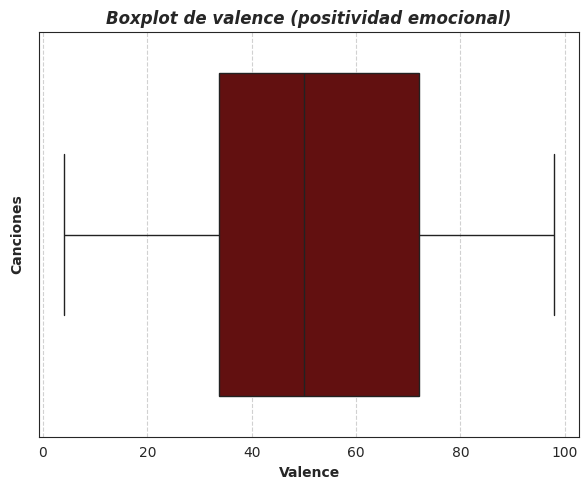

In [ ]:
#@title *Código del boxplot de valence*
plt.figure(figsize=(6, 5))
sns.boxplot(x=df_sample['valence'], color='#6f0303')

plt.title('Boxplot de valence (positividad emocional)', fontweight='bold', fontstyle='italic')
plt.xlabel('Valence', fontweight='bold')
plt.ylabel('Canciones', fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


### **1.3  Frecuencias y proporciones**

***Variable categórica: Genre***

Esta variable categórica representa el género musical asignado a cada canción según la clasificación de la base de datos.

Se eligió por ser una característica clave para analizar patrones de distribución dentro del repertorio y observar cómo los géneros predominantes pueden relacionarse conotras variables del conjunto, como en este caso la positivdad emocional.

##### **1.3.1 Gráfica de barras horizontales**

In [ ]:
#@title *Código del conteo de frecuencias de genre*

genre_counts = df_sample['genre'].value_counts()

print('\033[1;3mDistribución de la variable categórica genre:\033[0m')
print('-' * 50)
print("Frecuencias absolutas:\n", genre_counts)

Distribución de la variable categórica genre:
--------------------------------------------------
Frecuencias absolutas:
 genre
dance pop                    55
pop                          12
canadian pop                  8
boy band                      3
barbadian pop                 3
edm                           2
british soul                  2
permanent wave                2
art pop                       2
big room                      1
baroque pop                   1
contemporary country          1
chicago rap                   1
atl hip hop                   1
canadian contemporary r&b     1
downtempo                     1
complextro                    1
folk-pop                      1
neo mellow                    1
colombian pop                 1
Name: count, dtype: int64


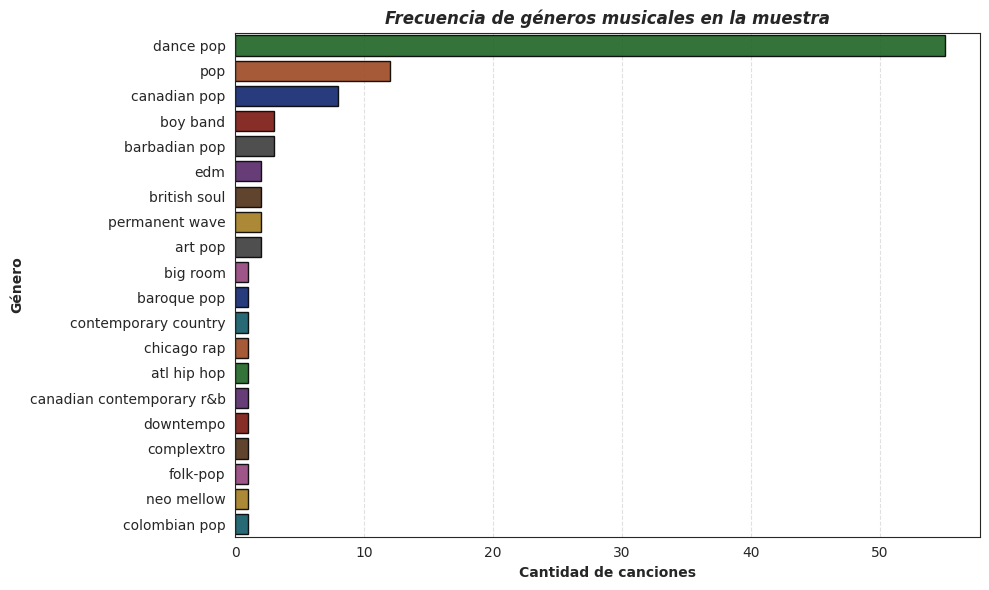

In [ ]:
#@title *Código del gráfico de distribución de genre*

plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample,
              y='genre',
              hue='genre',
              order=genre_counts.index,
              palette=sns.color_palette('dark', n_colors=len(genre_counts)),
              legend=False,
              edgecolor='black',
              alpha=0.9)

plt.title('Frecuencia de géneros musicales en la muestra', fontweight='bold', fontstyle='italic')
plt.xlabel('Cantidad de canciones', fontweight='bold')
plt.ylabel('Género', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### **1.3.2 Gráfico de sectores**

In [ ]:
#@title *Código de las proporciones de genre*

genre_proportions = df_sample['genre'].value_counts(normalize=True)

print('\033[1;3mDistribución de la variable categórica genre:\033[0m')
print('-' * 50)
print("\nProporciones:\n", genre_proportions)

Distribución de la variable categórica genre:
--------------------------------------------------

Proporciones:
 genre
dance pop                    0.55
pop                          0.12
canadian pop                 0.08
boy band                     0.03
barbadian pop                0.03
edm                          0.02
british soul                 0.02
permanent wave               0.02
art pop                      0.02
big room                     0.01
baroque pop                  0.01
contemporary country         0.01
chicago rap                  0.01
atl hip hop                  0.01
canadian contemporary r&b    0.01
downtempo                    0.01
complextro                   0.01
folk-pop                     0.01
neo mellow                   0.01
colombian pop                0.01
Name: proportion, dtype: float64


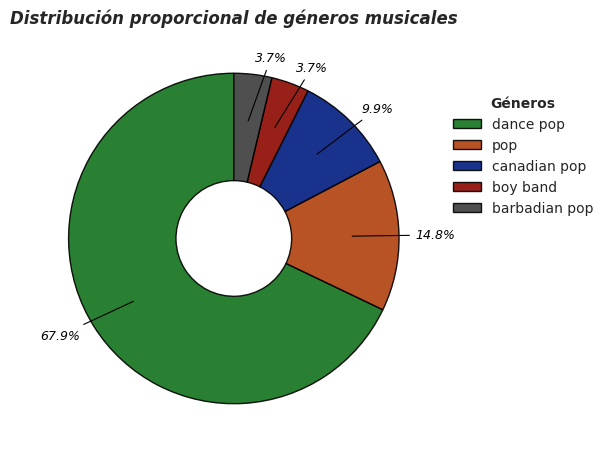

In [ ]:
#@title *Código gráfico de sectores para genre*

top_genres = genre_counts[genre_counts > 2]
colors = [genre_palette[genre] for genre in top_genres.index]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, _ = ax.pie(top_genres,
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.65, edgecolor='black', alpha=0.9))

total = sum(top_genres.values)
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1)/2.
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    ha = 'left' if x >= 0 else 'right'
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)

    ax.annotate(f'{top_genres.values[i]/total*100:.1f}%',
                xy=(x * 0.7, y * 0.7),
                xytext=(x * 1.1, y * 1.1),
                ha=ha,
                va='center',
                fontsize=9,
                fontstyle='italic',
                color='black',
                arrowprops=dict(arrowstyle="-", color='black', lw=0.8))

legend_labels = top_genres.index
legend = ax.legend(
    wedges,
    legend_labels,
    title='Géneros',
    loc='center left',
    bbox_to_anchor=(1, 0.7),
    frameon=False)
legend.get_title().set_fontweight('bold')

ax.set_title('Distribución proporcional de géneros musicales', fontweight='bold', fontstyle='italic')
plt.tight_layout()
plt.show()


##**Sección 2: Estimación de Parámetros**

### **2.1 Intervalo de confianza (Variable cuantitativa)**

In [ ]:
#@title *Código intervalo de confianza para la media de valence (95%)*

# Use the original dataframe 'df' in case df_sample is not defined
valence_data = df['valence'].dropna()

n = len(valence_data)

media = valence_data.mean()
desviacion = valence_data.std(ddof=1)

confianza = 0.95
alpha = 1 - confianza

t_critico = stats.t.ppf(1 - alpha/2, df=n-1)
margen_error = t_critico * (desviacion / np.sqrt(n))

limite_inferior = media - margen_error
limite_superior = media + margen_error

print(f"Intervalo de confianza del 95% para la media: [{limite_inferior:.3f}, {limite_superior:.3f}]")

Intervalo de confianza del 95% para la media: [50.425, 54.026]


### **2.2 Intervalo de confianza (Variable categórica)**

In [ ]:
#@title *Código intervalo de confianza para la proporción categórica de Dance Pop*

n = len(df_sample)
x = (df_sample['genre'] == 'dance pop').sum()
p_hat = x / n
z = 1.96


se = np.sqrt((p_hat * (1 - p_hat)) / n)

lower = p_hat - z * se
upper = p_hat + z * se

print(f"Proporción muestral de 'dance pop': {p_hat:.3f}")
print(f"Intervalo de confianza del 95%: [{lower:.3f}, {upper:.3f}]")


Proporción muestral de 'dance pop': 0.550
Intervalo de confianza del 95%: [0.452, 0.648]


### **2.3 Tamaño de muestra margen de error predefinido**

#### **2.3.1 Tamaño de la muestra según distintos márgenes de error**

In [ ]:
#@title *Código de los distintos tamaños de muestra*

z_95 = stats.norm.ppf(1 - 0.05 / 2)  # Z ≈ 1.96
s_valence = df_sample['valence'].std()
margenes_error = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
tamaños_muestra = []

for E in margenes_error:
    n = (z_95 * s_valence / E) ** 2
    tamaños_muestra.append(np.ceil(n))

tabla_muestras = pd.DataFrame({
    'Margen de error': [f'±{int(e*100)}%' for e in margenes_error],
    'Tamaño de muestra requerido': [f'{int(n):,}'.replace(',', '.') for n in tamaños_muestra]})
tabla_muestras


,Margen de error,Tamaño de muestra requerido
0,±2%,5.618.909
1,±3%,2.497.293
2,±4%,1.404.728
3,±5%,899.026
4,±6%,624.324
5,±7%,458.687
6,±8%,351.182
7,±9%,277.477


#### **2.3.2 Relación entre margen de error y tamaño de muestra requerido**

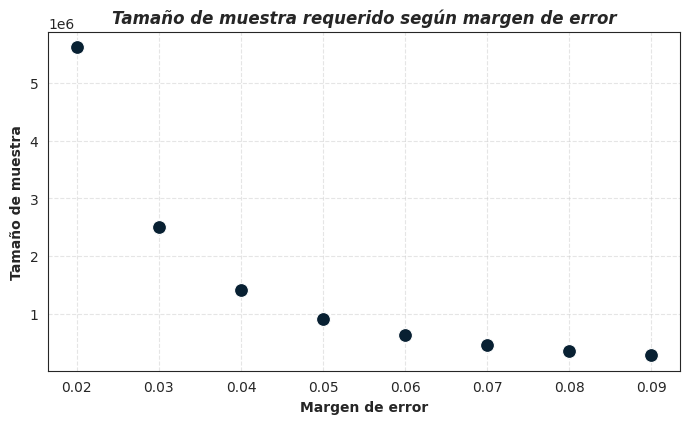

In [ ]:
#@title *Código grafico de puntos de la relación*

plt.figure(figsize=(7, 4.5))
sns.scatterplot(x=margenes_error, y=tamaños_muestra, s=100, color='#082032')

plt.title('Tamaño de muestra requerido según margen de error', fontweight='bold', fontstyle='italic')
plt.xlabel('Margen de error', fontweight='bold')
plt.ylabel('Tamaño de muestra', fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### **2.3.3 Tamaño de muestra necesario con margen de error del 5%**

In [ ]:
#@title *Código cálculo del muestra necesario con margen de error del 5%*

margen_elegido = 0.05
n_necesario = (z_95 * s_valence / margen_elegido) ** 2

print(f"Con un margen de error de ±5% y 95% de confianza, se necesitarían al menos {int(np.ceil(n_necesario))} canciones.")


Con un margen de error de ±5% y 95% de confianza, se necesitarían al menos 899026 canciones.


## **Sección 3: Pruebas de Hipótesis**

### **3.1 Prueba de hipótesis para la media (Variable cuantitativa)**

In [ ]:
#@title *Código prueba de hipótesis sobre la media de valence*

mu_0 = 0.5
x_barra = valence_data.mean()
s = valence_data.std(ddof=1)
n = len(valence_data)

t_stat = (x_barra - mu_0) / (s / np.sqrt(n))
df = n - 1

p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"Media muestral: {x_barra:.3f}")
print(f"Estadístico T: {t_stat:.3f}")
print(f"P-valor: {p_value:.3f}")


Media muestral: 52.226
Estadístico T: 56.420
P-valor: 0.000


### **3.2 Prueba de hipótesis para comparar dos medias**

***Variable cuantitativa: Popularity***
Esta variable representa el nivel de popularidad que ha alcanzado una canción, medido a través de una escala continua entre 0 y 100.

***Grupos:*** *Construidos con justificación basada en estudios y referencias presente en el pdf*

**Mainstream:** Incluye géneros con estética y posicionamiento comercial dentro del dataset. Son géneros con fuerte respaldo comercial.

**Alternativo:** Géneros menos representados y con una estética más experimental, de nicho o fuera del foco hegemónico del pop comercial.

#### **3.2.1 Definición de grupos**

In [ ]:
#@title *Código prueba de hipótesis sobre la media de valence*

mainstream_genres_sample = ['dance pop', 'pop', 'canadian pop', 'boy band', 'barbadian pop', 'edm',
    'big room', 'contemporary country']

df_sample['tipo_mercado'] = df_sample['genre'].apply(
    lambda x: 'Mainstream' if x in mainstream_genres_sample else 'Alternativo')

df_sample['tipo_mercado'].value_counts()

,count
tipo_mercado,
Mainstream,85
Alternativo,15


#### **3.2.2 Gráficas de popularidad por tipo de mercado**

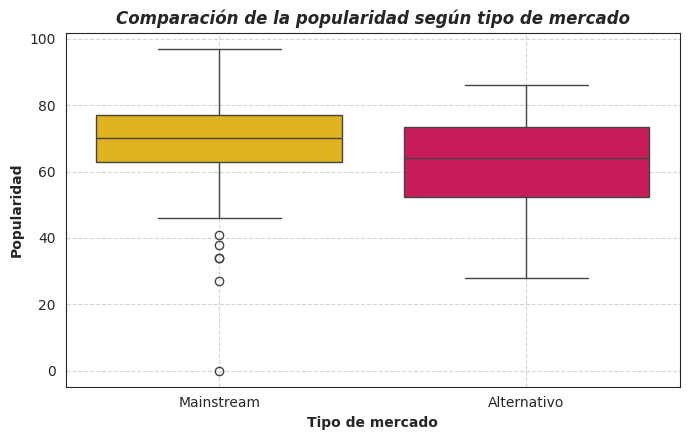

In [ ]:
#@title *Código boxplots de la popularidad por tipo de mercado*


colores_tipo_mercado = {'Mainstream': '#FFC300','Alternativo': '#E30052'}

plt.figure(figsize=(7, 4.5))
ax = sns.boxplot(data=df_sample,
    x='tipo_mercado',
    y='popularity',
    hue='tipo_mercado',
    palette=colores_tipo_mercado,
    legend=False)

plt.title('Comparación de la popularidad según tipo de mercado', fontweight='bold', fontstyle='italic')
plt.xlabel('Tipo de mercado', fontweight='bold')
plt.ylabel('Popularidad', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


#### **3.2.3 Medias por grupo**

In [ ]:
#@title *Cálculo de medias por grupo*

mainstream_pop = df_sample[df_sample['tipo_mercado'] == 'Mainstream']['popularity']
alt_pop = df_sample[df_sample['tipo_mercado'] == 'Alternativo']['popularity']

print(f"Media - Mainstream: {mainstream_pop.mean():.2f}")
print(f"Media - Alternativo: {alt_pop.mean():.2f}")


Media - Mainstream: 67.60
Media - Alternativo: 61.47


#### **3.2.4 Prueba de hipótesis para comparación de medias**

In [ ]:
#@title *Código de hipótesis comparación de medias*

t_stat, p_val = stats.ttest_ind(mainstream_pop, alt_pop, equal_var=True)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_val:.4f}')


Estadístico t: 1.478
Valor p: 0.1426


### **3.3 Prueba de hipótesis sobre proporciones**

#### **3.3.1 Cálculo sobre proporción de canciones mainstream**

In [ ]:
#@title *Código sobre proporción de canciones mainstream*

n_total = len(df_sample)
n_mainstream = (df_sample['tipo_mercado'] == 'Mainstream').sum()

p_observada = n_mainstream / n_total
p_0 = 0.5
z = (p_observada - p_0) / np.sqrt(p_0 * (1 - p_0) / n_total)
p_value = 1 - stats.norm.cdf(z)

print(f'Proporción observada: {p_observada:.2f}')
print(f'Estadístico Z: {z:.2f}')
print(f'Valor p: {p_value:.2f}')


Proporción observada: 0.85
Estadístico Z: 7.00
Valor p: 0.00


#### **3.3.2 Gráficos de la proporción**

##### **3.3.2.1 Gráfico de barras simples**

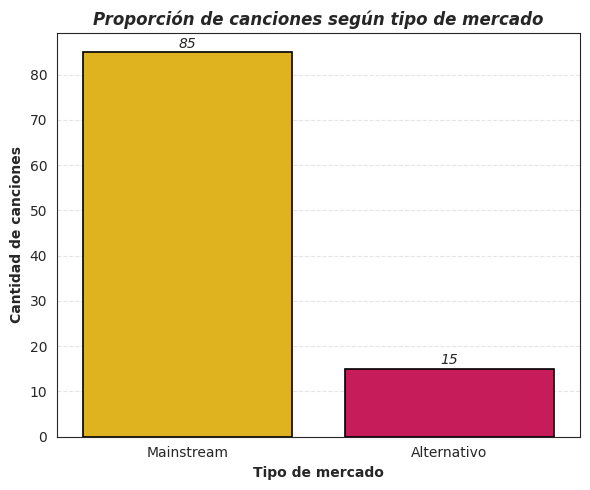

In [ ]:
#@title *Código barras proporciones por tipo de mercado*

conteo_mercado = df_sample['tipo_mercado'].value_counts().reset_index()
conteo_mercado.columns = ['tipo_mercado', 'conteo']

colores_tipo_mercado = {'Mainstream': '#FFC300','Alternativo': '#E30052'}
plt.figure(figsize=(6, 5))

ax = sns.barplot(
    data=conteo_mercado,
    x='tipo_mercado',
    y='conteo',
    hue='tipo_mercado',
    palette=colores_tipo_mercado,
    legend=False)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

plt.title('Proporción de canciones según tipo de mercado', fontweight='bold', fontstyle='italic')
plt.xlabel('Tipo de mercado', fontweight='bold')
plt.ylabel('Cantidad de canciones', fontweight='bold')

for i, valor in enumerate(conteo_mercado['conteo']):
    plt.text(i, valor + 1, f'{valor}', ha='center', fontstyle='italic')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


##### **3.3.2.2 Gráfico de sectores**

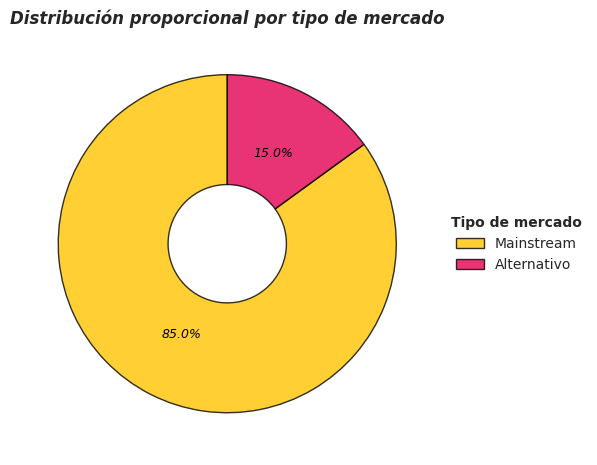

In [ ]:
#@title *Gráfico circular del tipo de mercado*
conteo = df_sample['tipo_mercado'].value_counts()
colores = ['#FFC300', '#E30052']

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    conteo,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    wedgeprops=dict(width=0.65, edgecolor='black', alpha=0.8))

plt.setp(autotexts, size=9, style='italic', color='black')
legend_labels = conteo.index

legend = ax.legend(wedges, legend_labels, title='Tipo de mercado',
                   loc='center left', bbox_to_anchor=(1, 0.5),
                   frameon=False)

legend.get_title().set_fontweight('bold')
ax.set_title('Distribución proporcional por tipo de mercado', fontweight='bold', fontstyle='italic')
plt.tight_layout()
plt.show()

## **Sección 4: Análisis de Correlación**

### **4.1 Análisis Descriptivo Bivariado**

**Variables a utilizar**: *Valance y popularity*

#### **4.1.1 Gráfica Hexbin plot**

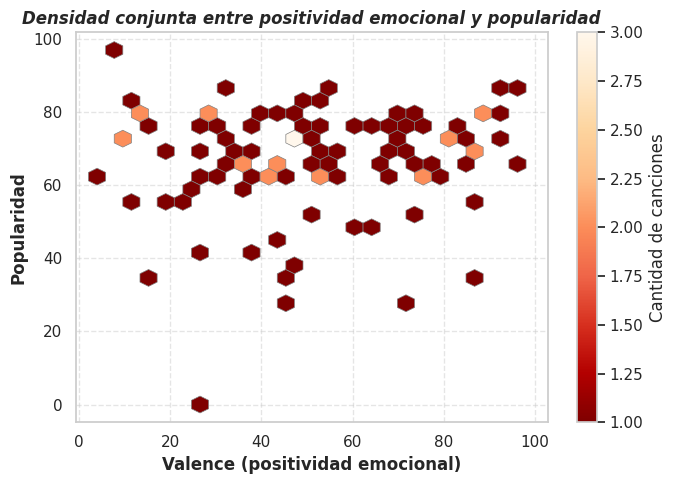

In [ ]:
#@title *Hexbin plot: Valence vs Popularity*

plt.figure(figsize=(7, 5))
hb = plt.hexbin(df_sample['valence'], df_sample['popularity'], gridsize=25, cmap='OrRd_r', mincnt=1, linewidths=0.5, edgecolors='grey')

plt.colorbar(hb, label='Cantidad de canciones')
plt.xlabel('Valence (positividad emocional)', fontweight='bold')
plt.ylabel('Popularidad', fontweight='bold')
plt.title('Densidad conjunta entre positividad emocional y popularidad', fontweight='bold', fontstyle='italic')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### **4.1.2 Gráfica Joint plot con KDE (Kernel Density Estimation)**

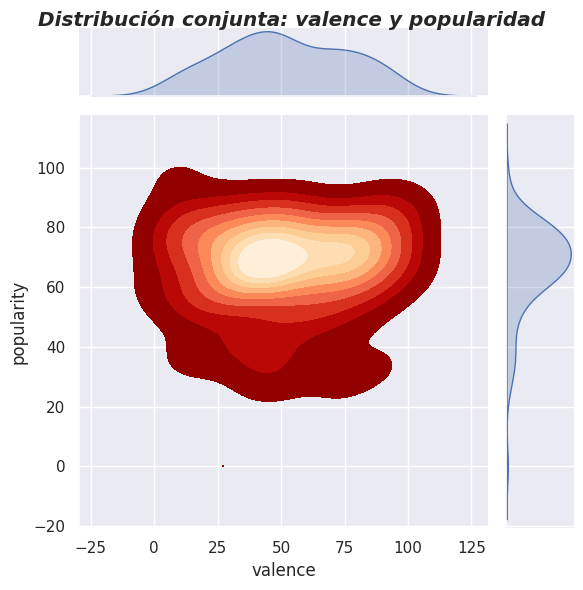

In [ ]:
#@title *Jointplot KDE: Valence vs Popularity*

sns.set(style="darkgrid")
g = sns.jointplot(
    data=df_sample,
    x="valence",
    y="popularity",
    kind="kde",
    fill=True,
    cmap="OrRd_r",
    height=6,
    space=0,)

g.fig.suptitle("Distribución conjunta: valence y popularidad", fontweight='bold', fontstyle='italic')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)


#### **4.1.3 Gráfica Violin plot (por cuartiles de popularidad)**

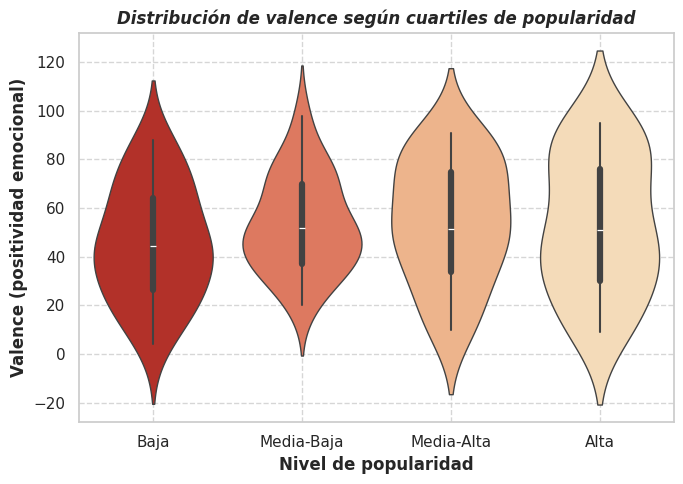

In [ ]:
#@title *Violin plot: Valence por cuartiles de Popularidad*

sns.set_style("whitegrid")

df_sample['popularity_quartile'] = pd.qcut(df_sample['popularity'], 4, labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'])
sns.set_style("whitegrid")
colors = sns.color_palette("OrRd_r", 4)

plt.figure(figsize=(7, 5))
sns.violinplot(
    data=df_sample,
    x='popularity_quartile',
    y='valence',
    hue='popularity_quartile',
    palette=colors,
    legend=False,
    linewidth=1)

plt.title('Distribución de valence según cuartiles de popularidad', fontweight='bold', fontstyle='italic')
plt.xlabel('Nivel de popularidad', fontweight='bold')
plt.ylabel('Valence (positividad emocional)', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

### **4.2 Coeficientes de correlación**

**Variables utilizadas**: *Valence y Popularity*

#### **4.2.1 Pearson**

In [ ]:
#@title *Código cálculo Pearson*

pearson_corr, p_pearson = stats.pearsonr(df_sample['valence'], df_sample['popularity'])

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Valor p: {p_pearson:.4f}")


Coeficiente de correlación de Pearson: 0.0864
Valor p: 0.3926


#### **4.2.2 Spearman**

In [ ]:
#@title *Código cálculo Spearman*

spearman_corr, p_spearman = stats.spearmanr(df_sample['valence'], df_sample['popularity'])

print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print(f"Valor p: {p_spearman:.4f}")


Coeficiente de correlación de Spearman: 0.0839
Valor p: 0.4065


#### **4.2.3 Cramer's V**

**Variables utilizadas**: *Popularidad dividida en cuartiles y Tipo de mercado (Mainstream vs Alternativo)*

In [ ]:
#@title *Código cálculo Cramer's V*

df_sample['valence_quartile'] = pd.qcut(df_sample['valence'], 4, labels=False)
df_sample['popularity_quartile'] = pd.qcut(df_sample['popularity'], 4, labels=False)

confusion_matrix = pd.crosstab(df_sample['valence_quartile'], df_sample['popularity_quartile'])

def cramers_v(conf_matrix):
    chi2 = ss.chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    r, k = conf_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V: {cramers_v_value:.4f}")


Cramér's V: 0.1592


#### **4.2.4 Eta Cuadrado (η²)**

**Variables utilizadas**: Tipo de mercado (Mainstream vs Alternativo) (Categórica Nominal) y Popularity (Variable Continua)

In [ ]:
#@title *Código cálculo Eta Cuadrado*

def eta_squared(data, cat_col, num_col):
    groups = data.groupby(cat_col)[num_col]
    ss_between = sum([len(group) * (group.mean() - data[num_col].mean())**2 for _, group in groups])
    ss_total = sum((data[num_col] - data[num_col].mean())**2)
    return ss_between / ss_total

eta_val = eta_squared(df_sample, 'popularity_quartile', 'valence')
print(f"Eta Cuadrado: {eta_val:.4f}")


Eta Cuadrado: 0.0216


### **4.3 Justificación**

#### **4.3.1 Gráficos del análisis bivariado**

In [ ]:
#@title *Código tabla gráficas*
tabla_visualizaciones = pd.DataFrame({
    'Visualización': ['Hexbin plot', 'Jointplot (con KDE)', 'Violin plot por cuartiles'],
    'Variables involucradas': [
        'valence vs. popularity',
        'valence vs. popularity',
        'valence vs. cuartiles de popularity'],
    'Propósito analítico': [
        'Muestra zonas de concentración sin sobrecargar visualmente',
        'Explora visualmente la densidad conjunta y posibles correlaciones',
        'Compara la distribución de valence según niveles de popularidad']})

display(HTML(tabla_visualizaciones.to_html(index=False)))

Visualización,Variables involucradas,Propósito analítico
Hexbin plot,valence vs. popularity,Muestra zonas de concentración sin sobrecargar visualmente
Jointplot (con KDE),valence vs. popularity,Explora visualmente la densidad conjunta y posibles correlaciones
Violin plot por cuartiles,valence vs. cuartiles de popularity,Compara la distribución de valence según niveles de popularidad


#### **4.3.2 Coeficientes de Correlación**

In [ ]:
#@title *Código tabla coeficientes*
tabla_coeficientes = pd.DataFrame({
    'Coeficiente': ['Pearson', 'Spearman', "Cramér's V", 'Eta cuadrado'],
    'Variables involucradas': [
        'valence vs. popularity',
        'valence vs. popularity',
        'valence (categ.) vs. popularity (categ.)',
        'valence vs. cuartiles de popularity'],
    'Tipo de relación': [
        'Lineal',
        'Monótona',
        'Asociación entre categorías',
        'Asociación entre grupos'],
    'Justificación': [
        'Relación directa entre variables numéricas continuas',
        'Más flexible ante atípicos y no requiere normalidad',
        'Útil para ver fuerza de asociación entre variables categóricas',
        'Evalúa cuánto de la variación en valence se explica por el grupo de popularidad']})

display(HTML(tabla_coeficientes.to_html(index=False)))


Coeficiente,Variables involucradas,Tipo de relación,Justificación
Pearson,valence vs. popularity,Lineal,Relación directa entre variables numéricas continuas
Spearman,valence vs. popularity,Monótona,Más flexible ante atípicos y no requiere normalidad
Cramér's V,valence (categ.) vs. popularity (categ.),Asociación entre categorías,Útil para ver fuerza de asociación entre variables categóricas
Eta cuadrado,valence vs. cuartiles de popularity,Asociación entre grupos,Evalúa cuánto de la variación en valence se explica por el grupo de popularidad


### **4.4 Conclusiones**

### **4.4.1 Gráficos del análisis bivariado**

In [ ]:
#@title *Código conclusiones gráficas*

conclusiones_visuales = pd.DataFrame({
    'Visualización': [
        'Hexbin plot',
        'Jointplot (con KDE)',
        'Violin plot por cuartiles'],
    'Conclusión principal': [
        'La relación entre valence y popularidad es dispersa y no presenta una tendencia evidente.',
        'Existe una leve tendencia conjunta pero la densidad es difusa, con concentración en valores medios.',
        'La distribución de valence varía ligeramente entre niveles de popularidad, pero no hay diferencias marcadas.']})
display(HTML(conclusiones_visuales.to_html(index=False)))

Visualización,Conclusión principal
Hexbin plot,La relación entre valence y popularidad es dispersa y no presenta una tendencia evidente.
Jointplot (con KDE),"Existe una leve tendencia conjunta pero la densidad es difusa, con concentración en valores medios."
Violin plot por cuartiles,"La distribución de valence varía ligeramente entre niveles de popularidad, pero no hay diferencias marcadas."


### **4.4.2 Coeficientes de correlación**

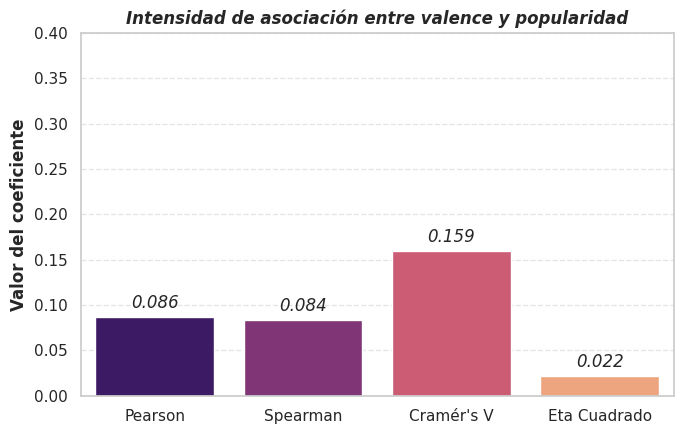

In [ ]:
#@title *Código gráfico de barras - Coeficientes*

coeficientes = {
    'Pearson': 0.0864,
    'Spearman': 0.0839,
    "Cramér's V": 0.1592,
    'Eta Cuadrado': 0.0216}

df_coef = pd.DataFrame.from_dict(coeficientes, orient='index', columns=['Valor'])
df_coef.reset_index(inplace=True)
df_coef.rename(columns={'index': 'Coeficiente'}, inplace=True)

plt.figure(figsize=(7, 4.5))
sns.barplot(data=df_coef, x='Coeficiente', y='Valor', hue='Coeficiente', dodge=False, palette='magma')
plt.legend([],[], frameon=False)

plt.title('Intensidad de asociación entre valence y popularidad', fontweight='bold', fontstyle='italic')
plt.ylim(0, 0.4)
plt.ylabel('Valor del coeficiente', fontweight='bold')
plt.xlabel('')

for i, row in df_coef.iterrows():
    plt.text(i, row['Valor'] + 0.01, f"{row['Valor']:.3f}", ha='center', fontstyle='italic')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()